In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [35]:
bitcoin_df = pd.read_csv("../Dataframes/bitcoin_df.csv")
ethereum_df = pd.read_csv("../Dataframes/ethereum_df.csv")
tether_df = pd.read_csv("../Dataframes/tether_df.csv")
binancecoin_df = pd.read_csv("../Dataframes/binancecoin_df.csv")
ripple_df = pd.read_csv("../Dataframes/ripple_df.csv")
usd_coin_df = pd.read_csv("../Dataframes/usd_coin_df.csv")
staked_ether_df = pd.read_csv("../Dataframes/staked_ether_df.csv")
cardano_df = pd.read_csv("../Dataframes/cardano_df.csv")
dogecoin_df = pd.read_csv("../Dataframes/dogecoin_df.csv")
solana_df = pd.read_csv("../Dataframes/solana_df.csv")

dfs = [bitcoin_df, ethereum_df, tether_df, binancecoin_df, ripple_df, usd_coin_df, staked_ether_df, cardano_df, dogecoin_df, solana_df]
combined_coin_df = pd.concat(dfs, ignore_index=True)
combined_coin_df["date"] = pd.to_datetime(combined_coin_df["date"])

# Descrpcion General

Veremos una descripcion general de las monedas de manera individal para tener un panorama general de ellas

In [36]:
combined_coin_df.head()

,date,id,prices,price_diff,returns,market_caps,market_caps_diff,total_volumes,total_volumes_diff,open,high,low
0,2013-04-30,bitcoin,135.30,-6.66,-0.0666,1.501657e+09,-73374511.0,0.0,0.0,135.30,141.96,135.30
1,2013-05-03,bitcoin,91.01,-12.42,-0.1242,1.011066e+09,-137601228.0,0.0,0.0,117.00,117.00,91.01
2,2013-05-07,bitcoin,106.40,-11.93,-0.1193,1.183766e+09,-132225804.0,0.0,0.0,111.25,118.33,106.40
3,2013-05-11,bitcoin,113.01,-5.77,-0.0577,1.259239e+09,-63750105.0,0.0,0.0,112.64,118.78,112.64
4,2013-05-15,bitcoin,114.16,-0.34,-0.0034,1.273850e+09,-3429307.0,0.0,0.0,114.71,117.18,114.16


In [49]:
combined_coin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6585 entries, 0 to 6584
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                6585 non-null   datetime64[ns]
 1   id                  6585 non-null   object        
 2   prices              6585 non-null   float64       
 3   price_diff          6582 non-null   float64       
 4   returns             6582 non-null   float64       
 5   market_caps         6585 non-null   float64       
 6   market_caps_diff    6582 non-null   float64       
 7   total_volumes       6585 non-null   float64       
 8   total_volumes_diff  6582 non-null   float64       
 9   open                6585 non-null   float64       
 10  high                6585 non-null   float64       
 11  low                 6585 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 617.5+ KB


In [37]:
combined_coin_df.dtypes

date                  datetime64[ns]
id                            object
prices                       float64
price_diff                   float64
returns                      float64
market_caps                  float64
market_caps_diff             float64
total_volumes                float64
total_volumes_diff           float64
open                         float64
high                         float64
low                          float64
dtype: object

In [38]:
combined_coin_df.describe().astype(str)

,date,prices,price_diff,returns,market_caps,market_caps_diff,total_volumes,total_volumes_diff,open,high,low
count,6585,6585.0,6582.0,6582.0,6585.0,6582.0,6585.0,6582.0,6585.0,6585.0,6585.0
mean,2019-09-03 09:39:16.810933760,1991.1957661351553,1.5837724096019463,0.01583772409601945,56362952989.32565,40445976.82112421,7231686455.231872,211800717.6425297,1991.0041336370537,2050.3972285497343,1930.9107091875471
min,2013-04-30 00:00:00,0.0,-5070.059999999998,-50.70059999999998,0.0,-95695301937.05003,0.0,-102400191368.52,0.0,0.0,0.0
25%,2017-10-11 00:00:00,0.25,-0.01,-0.0001,754704945.55,-77825707.61499977,26755428.02,-77401857.73249999,0.25,0.25,0.24
50%,2020-01-27 00:00:00,1.0,0.0,0.0,8944473292.0,181644.94999999925,518053273.61,0.0,1.0,1.0,1.0
75%,2021-11-27 00:00:00,296.41,0.02,0.0002,41149656904.52,122045709.39249897,3860729122.88,88261259.89250006,297.75,306.25,288.02
max,2023-08-19 00:00:00,65648.98,4997.369999999995,49.97369999999995,1239021452560.9,92855953330.65002,926767674515.14,848384490490.39,65005.65,67617.02,64432.05
std,nan,7345.967328144424,258.6347860251905,2.5863478602516787,144543299784.43414,5333518618.426585,20297710022.626095,11661398779.585712,7358.373698129174,7569.190190122703,7135.388975883344


In [39]:
unique_ids = combined_coin_df["id"].unique()
unique_ids

array(['bitcoin', 'ethereum', 'tether', 'binancecoin', 'ripple',
       'usd-coin', 'staked-ether', 'cardano', 'dogecoin', 'solana'],
      dtype=object)

In [40]:
fig = px.line(combined_coin_df, x="date", y="prices", color="id",
                 title="Comparación de precios entre monedas")

fig.show()

debido al alto precio de la bitcoin no se puede observar con buen detalle el precio de las otras monedas

removeremos la bitcoin en la siguiente grafica

In [41]:
fig = px.line(combined_coin_df, x="date", y="market_caps", color="id",
                 title="Comparación de la capitalizacion de mercado entre monedas")

fig.show()

In [42]:
# Lista de DataFrames
dataframes = [bitcoin_df, ethereum_df, tether_df, binancecoin_df, ripple_df, usd_coin_df,
              staked_ether_df, cardano_df, dogecoin_df, solana_df]

# Calcular y mostrar la volatilidad de cada DataFrame
for df in dataframes:
    volatility = df["returns"].std()
    print(f"Volatilidad de {df['id'].iloc[0]}: {volatility:.2%}")

Volatilidad de bitcoin: 666.28%
Volatilidad de ethereum: 55.90%
Volatilidad de tether: 0.01%
Volatilidad de binancecoin: 9.04%
Volatilidad de ripple: 0.04%
Volatilidad de usd-coin: 0.00%
Volatilidad de staked-ether: 93.26%
Volatilidad de cardano: 0.04%
Volatilidad de dogecoin: 0.01%
Volatilidad de solana: 4.72%


In [47]:
# Ejemplo de scatter plot entre precios y retornos utilizando Plotly Express
fig = px.scatter(combined_coin_df, x='prices', y='returns', color="id", title='Relación entre Precios y Retornos')
fig.show()

In [52]:
fig = px.bar(combined_coin_df, x='market_caps', y='id', color="id", orientation='h', title='Capitalización de Mercado')
fig.update_layout(xaxis_title='USD', yaxis_title='Criptomoneda')
fig.show()

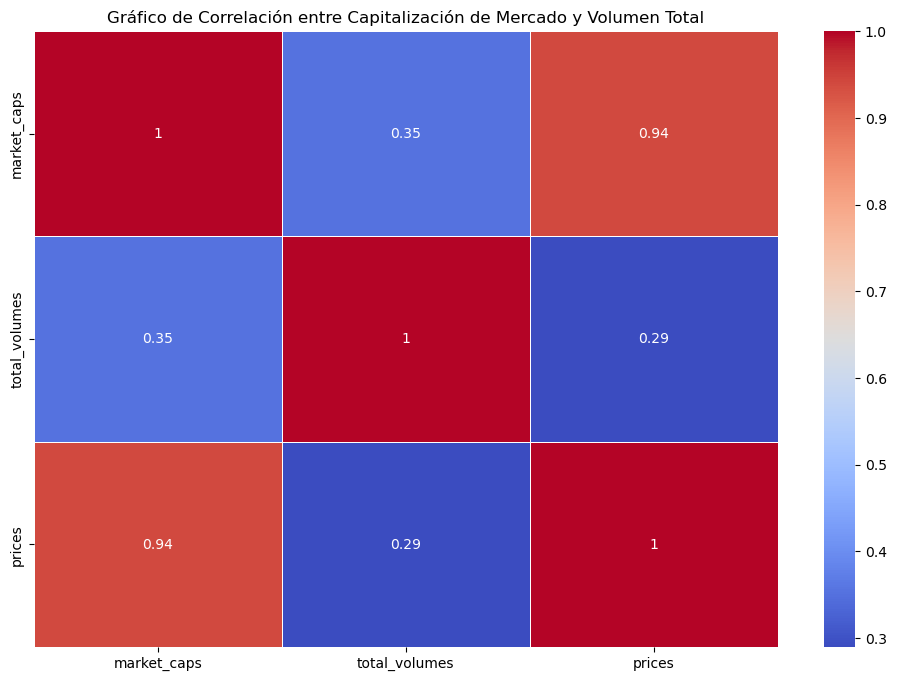

In [56]:
top10mkt = combined_coin_df[['market_caps', 'total_volumes', 'prices']]

# Crear un gráfico de correlación utilizando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(top10mkt.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Gráfico de Correlación entre Capitalización de Mercado y Volumen Total')
plt.show()

In [58]:
# Ejemplo de scatter plot entre precios y market_caps utilizando Plotly Express
fig = px.scatter(combined_coin_df, x='prices', y='market_caps', color="id", title='Relación entre Precios y capitalizacion de mercado')
fig.show()

In [60]:
# Ejemplo de scatter plot entre precios y market_caps utilizando Plotly Express
fig = px.scatter(combined_coin_df, x='prices', y='total_volumes', color="id", title='Relación entre Precios y volumenes')
fig.show()

In [61]:
'market_caps', 'total_volumes'
fig = px.scatter(combined_coin_df, x='market_caps', y='total_volumes', color="id", title='Relación entre capitalizacion de mercado y volumenes')
fig.show()